# Analyse de la variance - ANOVA

In [1]:
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from statsmodels.api import stats
from scipy import stats as scp

P-value sur les groupes par type: 0.362707398036055
P-value sur les groupes par amount: 0.31082742383532785
P-value du test de normalité sur les groupes Type: 0.6655752375214201
P-value du test de normalité sur les groupes Amount: 0.6655752375214075
                   sum_sq    df          F    PR(>F)
Amount        3168.266667   1.0  14.876778  0.000299
Type           220.900000   1.0   1.037249  0.312842
Amount:Type    883.600000   1.0   4.148995  0.046397
Residual     11926.166667  56.0        NaN       NaN


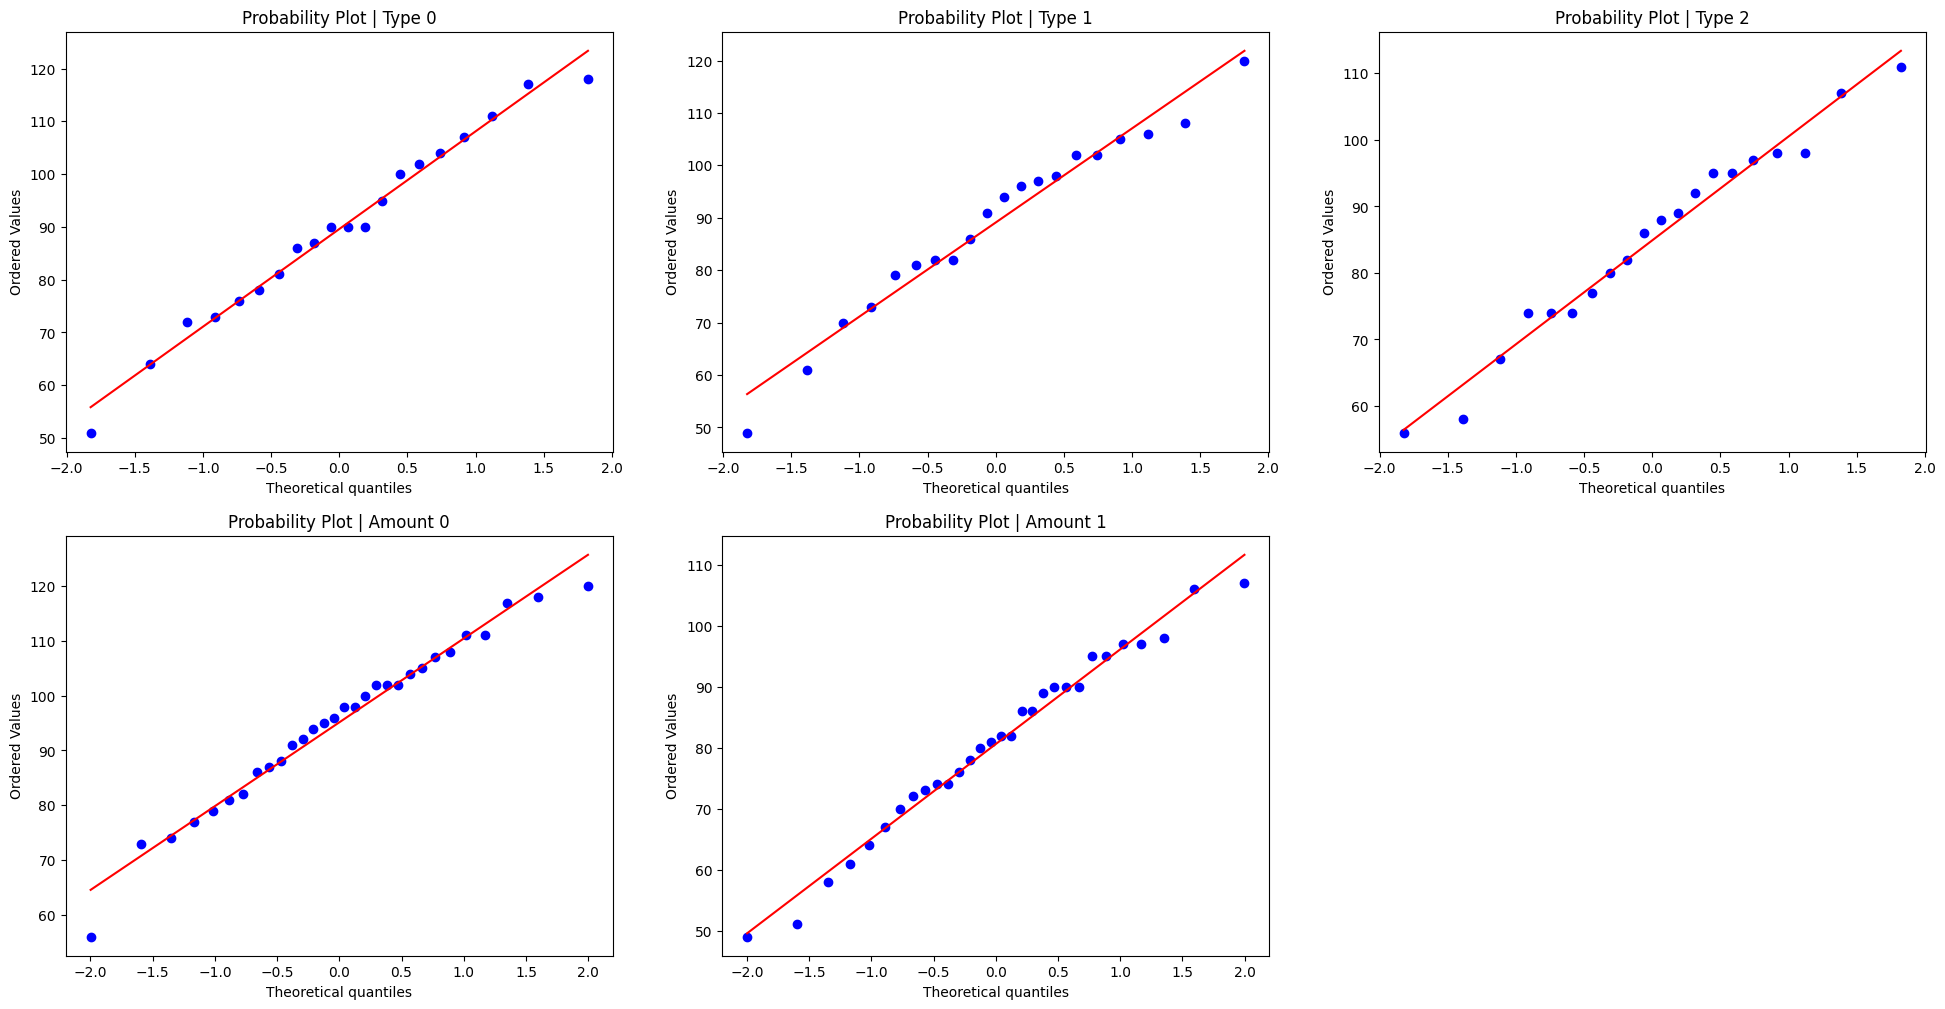

In [2]:
data = pd.read_csv("./data/anova/Rat_weights.csv", delimiter='\t')

# Vérification des hypothèses de l'anova
#   - homoscédasticité
#       test sur chaque 'groupe' (par type ensuite par amount)
#       H0 = toutes les variances sont identiques
#       résultat => On peut pas rejeter H0

type_groups = [x[1]["Weight"].values for x in data.groupby(["Type"])]
type_test = scp.bartlett(*type_groups)
print("P-value sur les groupes par type:", type_test.pvalue)

amount_groups = [x[1]["Weight"].values for x in data.groupby(["Amount"])]
amount_test = scp.bartlett(*amount_groups)
print("P-value sur les groupes par amount:", amount_test.pvalue)

#   - normalité
#       H0: toutes les variables sont normales
#       résultat => On peut pas rejeter H0

normal_test = scp.shapiro(type_groups)
print("P-value du test de normalité sur les groupes Type:", normal_test.pvalue)

normal_test = scp.shapiro(amount_groups)
print("P-value du test de normalité sur les groupes Amount:", normal_test.pvalue)

plt.figure(figsize=(24,12))
n = 1
for i, (name, groups) in enumerate([("Type", type_groups), ("Amount", amount_groups)]):
    for j, group in enumerate(groups):
        plt.subplot(2, 3, n)
        scp.probplot(group, dist="norm", plot=plt)
        plt.title(f"Probability Plot | {name} {j}")
        n += 1

# Analyse de la variance - ANOVA à plusieurs facteurs
rl = ols("Weight ~ Amount + Type + Amount*Type", data=data).fit()

aov_table = stats.anova_lm(rl, typ=2)
print(aov_table)